In [2]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [4]:
laptop_data = pd.read_csv("laptop_pricing_dataset_mod2.csv")
laptop_data = laptop_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
laptop_data


,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,2,1,7,14.0,0.896552,8,256,3.74850,1891,Medium,0,1
234,Toshiba,3,2,1,5,13.3,0.827586,8,256,2.64600,1950,Medium,1,0
235,Lenovo,4,2,1,5,12.0,0.896552,8,256,2.99880,2236,Medium,0,1
236,Lenovo,3,3,1,5,15.6,0.862069,6,256,5.29200,883,Low,1,0


In [36]:
y_data = laptop_data['Price']
x_data = laptop_data.drop('Price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

In [39]:
lr = LinearRegression()
lr.fit(x_train[['CPU_frequency']], y_train)
print(lr.score(x_test[['CPU_frequency']], y_test))
print(lr.score(x_train[['CPU_frequency']], y_train))

-0.06599437350393789
0.14829792099817973


In [44]:
# Cross Validation
Rcross = cross_val_score(lr, x_data[['CPU_frequency']], y_data, cv=4)
print(Rcross)
print("mean = ", Rcross.mean())
print("std = ", Rcross.std())

[-0.82012763  0.10035872  0.11202939 -0.03662978]
mean =  -0.16109232388595113
std =  0.384957978666471


# OverFitting


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.50, random_state=0)
r2_list = []
for deg in range(1, 6):
    pr = PolynomialFeatures(degree=deg)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.transform(x_test[['CPU_frequency']])
    poly_lr = LinearRegression()
    poly_lr.fit(x_train_pr, y_train)
    r2_list.append(poly_lr.score(x_test_pr, y_test))
    
r2_list

[0.05322174176198102,
 -0.026920818679000424,
 0.051563457925586365,
 -0.994813791548155,
 -1.3759360956016184]

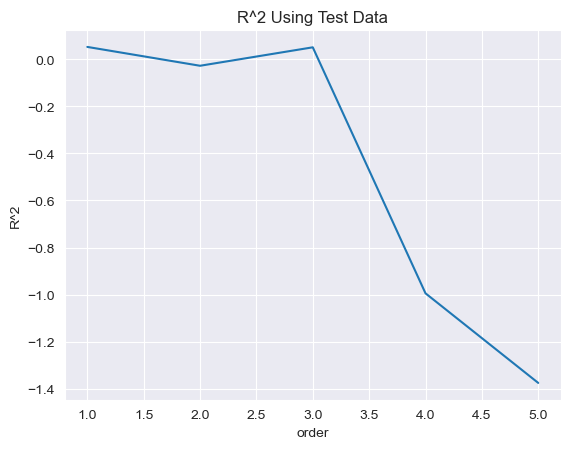

In [50]:
plt.plot([1, 2, 3, 4, 5], r2_list)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.show()
plt.close()

#   Task 3 : Ridge Regression

In [53]:
pr2 = PolynomialFeatures(degree=2)
x_train_pr_2 = pr2.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr_2 = pr2.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

In [54]:
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr_2, y_train)
    test_score, train_score = RigeModel.score(x_test_pr_2, y_test), RigeModel.score(x_train_pr_2, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:09<00:00, 105.34it/s, Test Score=0.423, Train Score=0.669]


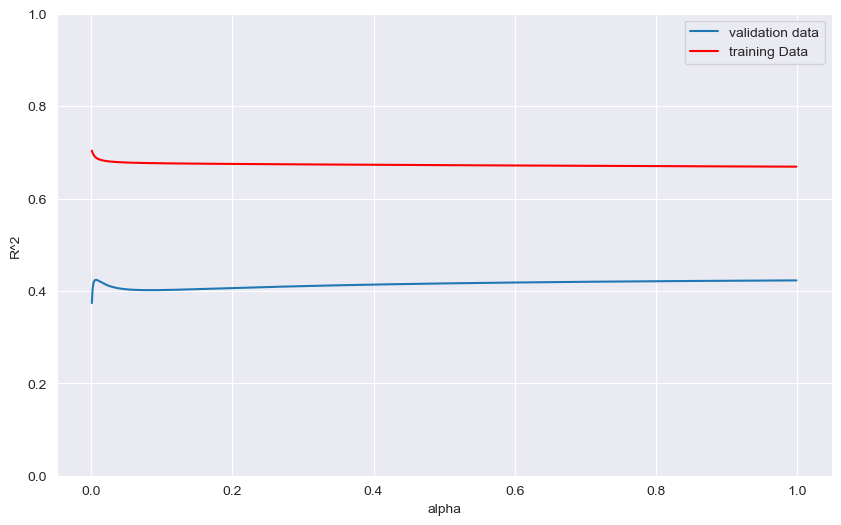

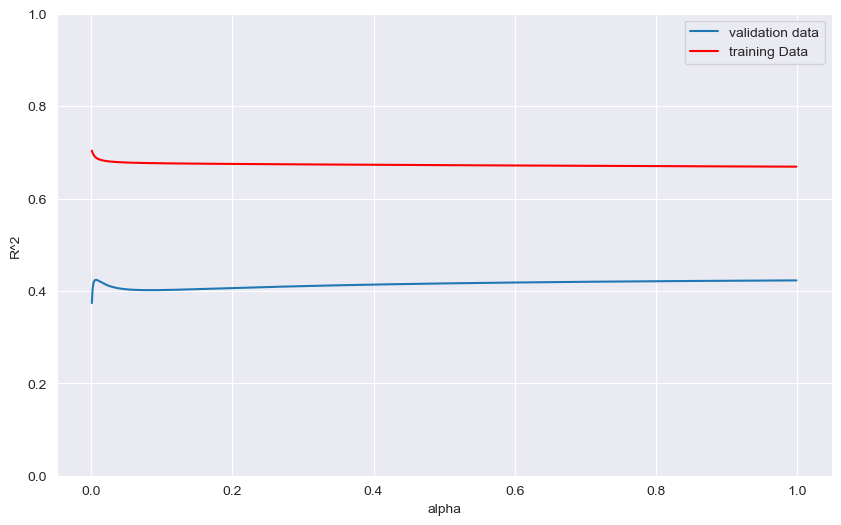

In [56]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()
plt.show()
plt.close()

#   Task 4: Grid Search

In [58]:
parameters1= [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]

In [62]:
r = Ridge()
gridSereach = GridSearchCV(r, parameters1, cv=4)
gridSereach.fit(x_data[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_data)
gridSereach.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test)

0.4412383966156087